# Visualize predictions

In [1]:
# public modules
from dlcliche.notebook import *
from dlcliche.utils import (
    sys, random, Path, np, plt, EasyDict,
    ensure_folder, deterministic_everything,
)
from argparse import Namespace

# private modules
sys.path.append('..')
import common as com

from pytorch_common import (
    Task2Lightning, torch, pl
)

# loading parameters -> hparams (argparse compatible)
params = EasyDict(com.yaml_load('config.yaml'))

# set only one test directory
params.target = ['ToyCar']

# test directories
dirs = com.select_dirs(param=params, mode='development')

# fix random seeds
deterministic_everything(2020, pytorch=True)

# PyTorch device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

2020-03-14 16:02:10,870 - INFO - load_directory <- development


In [2]:
for target_dir in dirs:
    target = str(target_dir).split('/')[-1]
    print(f'==== [{target}] with {torch.cuda.device_count()} GPU(s) ====')

    files = com.file_list_generator(target_dir)
    task2 = Task2Lightning(device, params, files, summary=(target == 'ToyCar'))
    
    model_file = f'{params.model_directory}/model_{target}.pth'
    task2.model.load_state_dict(torch.load(model_file))
    task2.model = task2.model.to(device)

2020-03-14 16:02:10,897 - INFO - target_dir : dev_data/ToyCar
2020-03-14 16:02:10,906 - INFO - # of training samples : 4000


==== [ToyCar] with 1 GPU(s) ====
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          82,048
       BatchNorm1d-2                  [-1, 128]             256
       _LinearUnit-3                  [-1, 128]               0
            Linear-4                  [-1, 128]          16,512
       BatchNorm1d-5                  [-1, 128]             256
       _LinearUnit-6                  [-1, 128]               0
            Linear-7                  [-1, 128]          16,512
       BatchNorm1d-8                  [-1, 128]             256
       _LinearUnit-9                  [-1, 128]               0
           Linear-10                  [-1, 128]          16,512
      BatchNorm1d-11                  [-1, 128]             256
      _LinearUnit-12                  [-1, 128]               0
           Linear-13                    [-1, 8]           1,032
      

## Visualize 

2020-03-14 16:02:12,174 - INFO - Loading cached __cache_ToyCar_val.npy


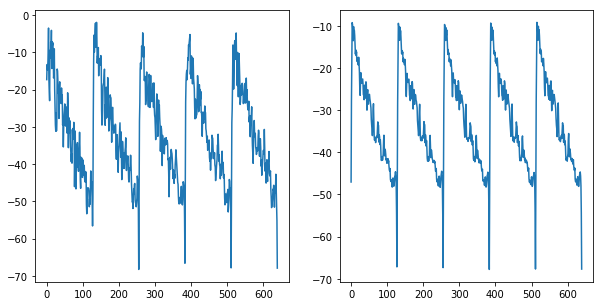

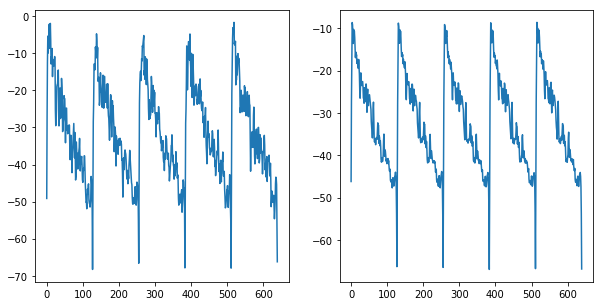

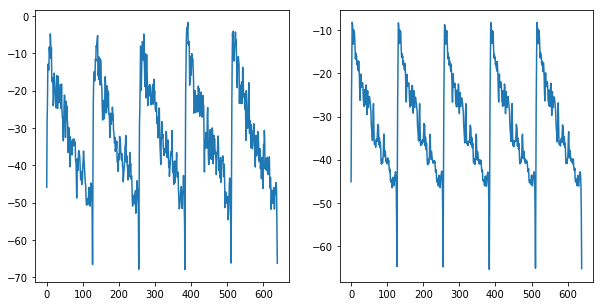

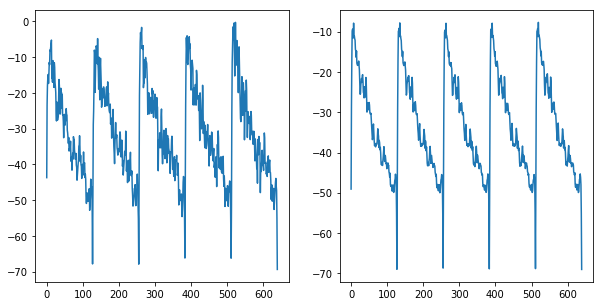

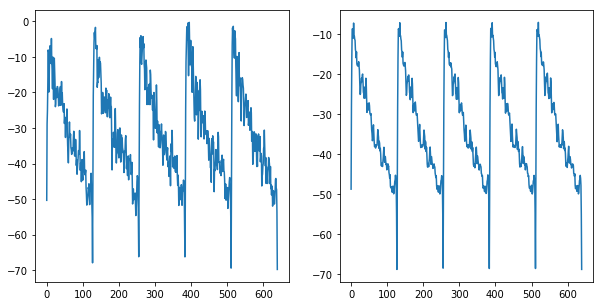

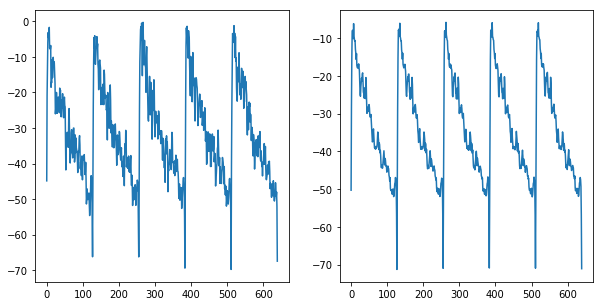

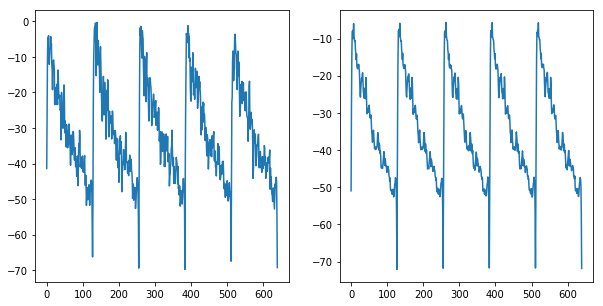

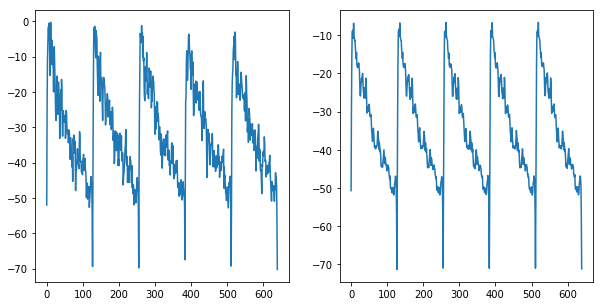

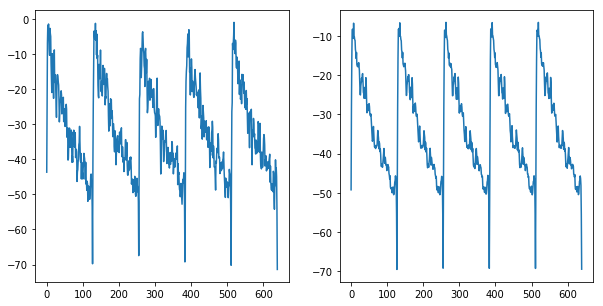

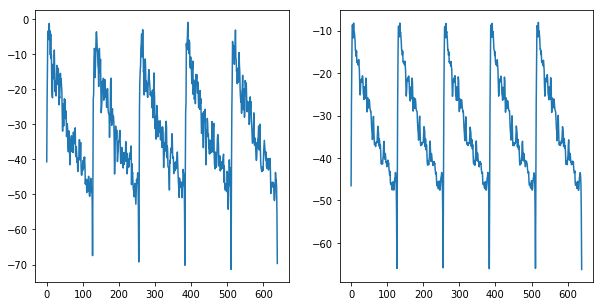

In [3]:
# Get one batch of samples from validation set, then get model prediction result.
dl = task2.val_dataloader()
x, y = next(iter(dl))
with torch.no_grad():
    yhat = task2.model(x)
# Show 
for i in range(10):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sample_idx = i
    axs[0].plot(x.cpu().numpy()[sample_idx][0]); axs[1].plot(yhat.cpu().numpy()[sample_idx][0]);